# Homework 1
## Advanced Data Analysis

In [1]:
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib

# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(0)  # set the random seed for reproducibility

def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    noise = 0.05 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise


def calc_design_matrix(x, c, h):
    return np.exp(-(x[None] - c[:, None]) ** 2 / (2 * h ** 2))


In [2]:
# create sample
sample_size = 50
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)
print(x.shape, y.shape)

(50,) (50,)


# Define L1 CLS

In [228]:

def iteratively_reweighted_shrinkage(sample_size, k, y, l, n_iter=1000):
    # initialize theta using the solution of regularized ridge regression
    theta = theta_prev = np.linalg.solve(k.T.dot(k) + 1e-4 * np.identity(sample_size), k.T.dot(y))
    eta = np.Inf # for L1 regularized L2 loss minimization
    for _ in range(n_iter):
        r = np.abs(k.dot(theta_prev) - y)
        W = np.diag(np.where(r > eta, eta / r, 1.))
        # contruct Phi matrix using computed theta
        Phi = np.diag(np.abs(theta))
        # take generalized inverse of phi
        Phi_gi = np.linalg.pinv(Phi)
        # compute new theta
        theta = np.linalg.solve(k.T.dot(W).dot(k) + l * Phi_gi + 0.000001*np.identity(sample_size), k.T.dot(W).dot(y)) # adding 10−6 for stability
        # check for convergence
        if np.linalg.norm(theta - theta_prev) < 1e-3: break
        theta_prev = theta
    return theta


# Visualize L1 Regression

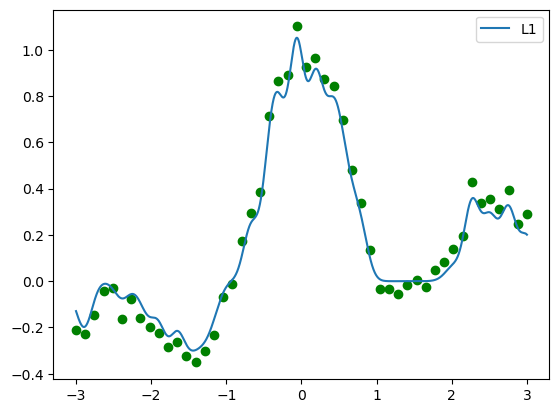

In [229]:

# create sample
sample_size = 50
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)

# calculate design matrix
h = 0.1
k = calc_design_matrix(x, x, h)

# solve the L1 least square problem
l = 0.1
theta1 = iteratively_reweighted_shrinkage(sample_size,k,y,l)

# solve the L2 least square problem
l = 0.3
theta2 = np.linalg.solve(
    k.T.dot(k) + l * np.identity(len(k)),
    k.T.dot(y[:, None]))

# create data to visualize the L2 prediction
X = np.linspace(start=xmin, stop=xmax, num=5000)
K = calc_design_matrix(x, X, h)
prediction1 = K.dot(theta1)
prediction2 = K.dot(theta2)

# visualization
plt.clf()
plt.scatter(x, y, c='green', marker='o')
plt.plot(X, prediction1,label="L1")
plt.legend()
plt.show()

# Visualize L2 Regression

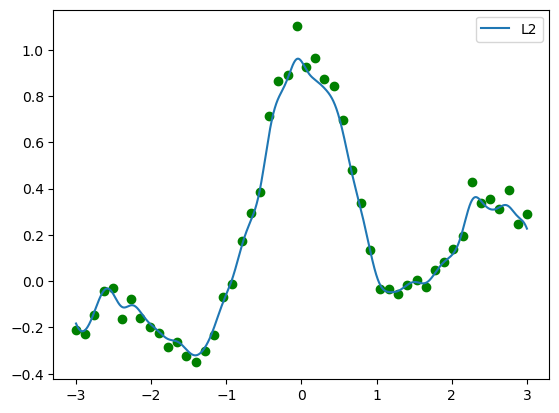

In [230]:
plt.clf()
plt.scatter(x, y, c='green', marker='o')
plt.plot(X, prediction2, label="L2")
plt.legend()
plt.show()